In [546]:
import pandas as pd
file_path=r"C:\Users\SAI CHARAN\Downloads\Downloads for project\Walmart.csv"
df=pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [469]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [547]:
df['DateTime']=pd.to_datetime(df['Date'],format='%d-%m-%Y')

In [549]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DateTime
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02-05
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03-05


In [548]:
df.drop(columns=['Date'],inplace=True)

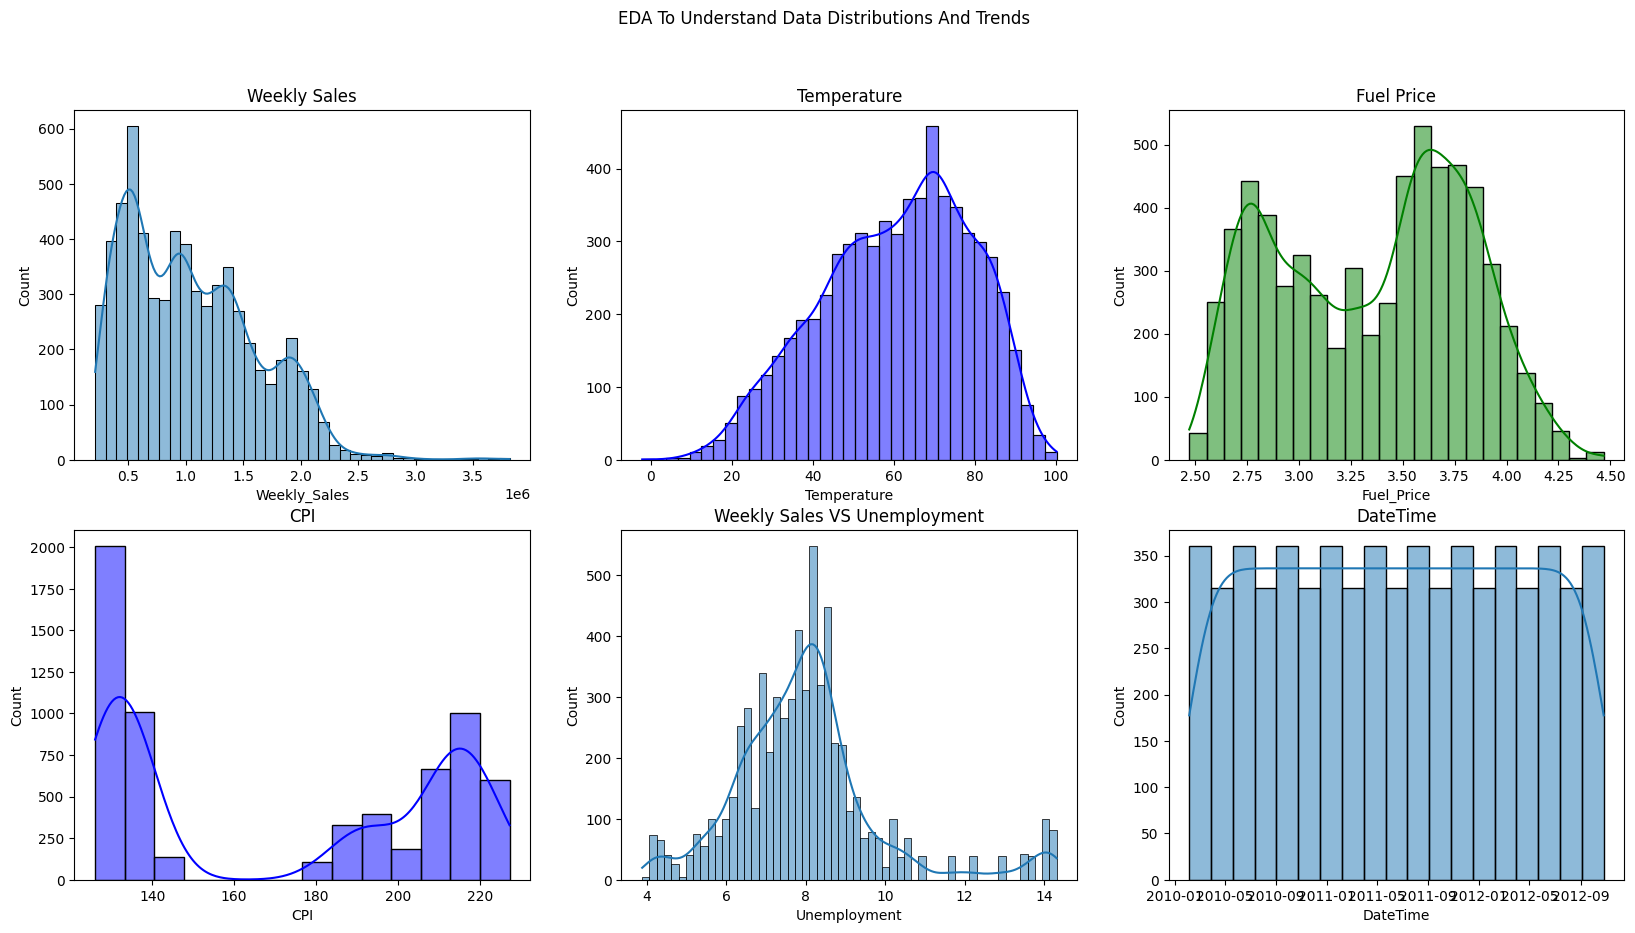

In [472]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,axes=plt.subplots(2,3,figsize=(20,10))
sns.histplot(x='Weekly_Sales',kde=True,ax=axes[0,0],data=df)
axes[0,0].set_title("Weekly Sales")
sns.histplot(x='Temperature',data=df,kde=True,ax=axes[0,1],color='blue')
axes[0,1].set_title("Temperature")
sns.histplot(x='Fuel_Price',data=df,kde=True,ax=axes[0,2],color='green')
axes[0,2].set_title("Fuel Price")
sns.histplot(x='CPI',data=df,kde=True,ax=axes[1,0],color='blue')
axes[1,0].set_title("CPI")
sns.histplot(x='Unemployment',kde=True,data=df,ax=axes[1,1])
axes[1,1].set_title("Weekly Sales VS Unemployment")
sns.histplot(x='DateTime',kde=True,data=df,ax=axes[1,2])
axes[1,2].set_title("DateTime")
plt.suptitle("EDA To Understand Data Distributions And Trends")
plt.show()

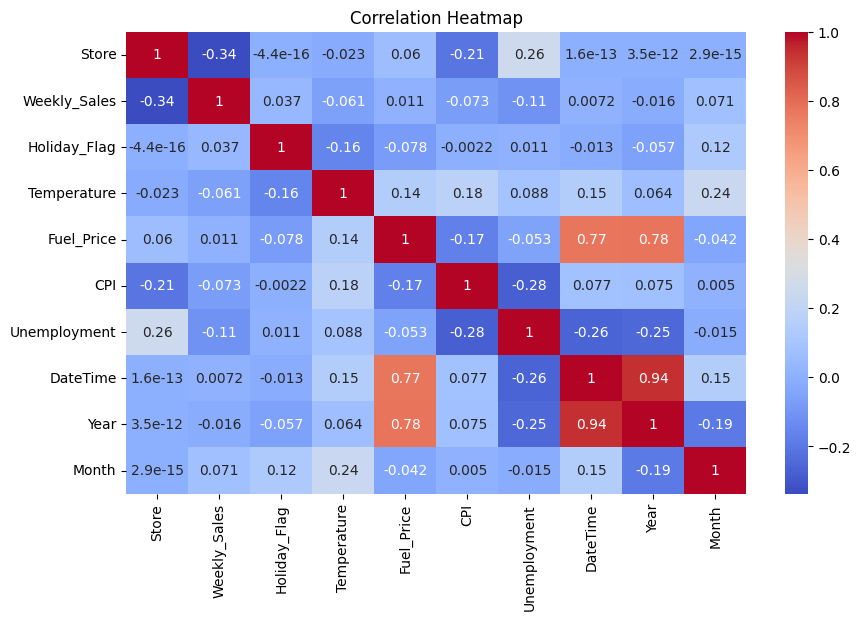

In [573]:
corr=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [575]:
#Vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
numerical_data=df[['Store','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']].copy()
numerical_data.loc[:,'Intercept']=1
vif_data=pd.DataFrame()
vif_data['Feature']=numerical_data.columns
vif_data["VIF"]=[variance_inflation_factor(numerical_data.values,i)for i in range(numerical_data.shape[1])]
print(vif_data)

        Feature        VIF
0         Store   1.097781
1  Holiday_Flag   1.029051
2   Temperature   1.123825
3    Fuel_Price   1.090652
4           CPI   1.219702
5  Unemployment   1.184665
6     Intercept  26.266588


In [550]:
df['Year']=df['DateTime'].dt.year
df['Month']=df['DateTime'].dt.month
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DateTime,Year,Month
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02-05,2010,2
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12,2010,2
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19,2010,2
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26,2010,2
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03-05,2010,3


In [554]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df['Temperature']=scaler.fit_transform(df[['Temperature']])
df['Fuel_Price']=scaler.fit_transform(df[['Fuel_Price']])
df['CPI']=scaler.fit_transform(df[['CPI']])
df['Unemployment']=scaler.fit_transform(df[['Unemployment']])

In [555]:
Q1=df['Weekly_Sales'].quantile(0.25)
Q3=df['Weekly_Sales'].quantile(0.75)
IQR=Q3-Q1
print(f"Q1 Q3 IQR:",Q1,Q3,IQR)
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(f"Lower Bound Upper Bound:",lower_bound,upper_bound)
df['Weekly_Sales']=df['Weekly_Sales'].apply(lambda x:lower_bound if x<lower_bound else(upper_bound if x>upper_bound else x))

Q1 Q3 IQR: 553350.105 1420158.66 866808.5549999999
Lower Bound Upper Bound: -746862.7275 2720371.4924999997


In [556]:
Q1=df['Temperature'].quantile(0.25)
Q3=df['Temperature'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(f"Q1 Q3 IQR:",Q1,Q3,IQR)
print(f"Lower Bound Upper Bound:",lower_bound,upper_bound)
df['Temperature']=df['Temperature'].apply(lambda x:lower_bound if x<lower_bound else(upper_bound if x>upper_bound else x))


Q1 Q3 IQR: 0.48454011741682973 0.7534246575342466 0.26888454011741686
Lower Bound Upper Bound: 0.08121330724070447 1.1567514677103719


In [557]:
Q1=df['Fuel_Price'].quantile(0.25)
Q3=df['Fuel_Price'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(f"Q1 Q3 IQR:",Q1,Q3,IQR)
print(f"Lower Bound Upper Bound:",lower_bound,upper_bound)
df['Fuel_Price']=df['Fuel_Price'].apply(lambda x:lower_bound if x<lower_bound else(upper_bound if x>upper_bound else x))

Q1 Q3 IQR: 0.2309619238476952 0.6327655310621241 0.40180360721442887
Lower Bound Upper Bound: -0.3717434869739481 1.2354709418837673


In [558]:
Q1=df['CPI'].quantile(0.25)
Q3=df['CPI'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(f"Q1 Q3 IQR:",Q1,Q3,IQR)
print(f"Lower Bound Upper Bound:",lower_bound,upper_bound)
df['CPI']=df['CPI'].apply(lambda x:lower_bound if x<lower_bound else(upper_bound if x>upper_bound else x))

Q1 Q3 IQR: 0.056054827366017745 0.8567788450975384 0.8007240177315207
Lower Bound Upper Bound: -1.1450311992312632 2.0578648716948194


In [559]:
Q1=df['Unemployment'].quantile(0.25)
Q3=df['Unemployment'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(f"Q1 Q3 IQR:",Q1,Q3,IQR)
print(f"Lower Bound Upper Bound:",lower_bound,upper_bound)
df['Unemployment']=df['Unemployment'].apply(lambda x:lower_bound if x<lower_bound else(upper_bound if x>upper_bound else x))

Q1 Q3 IQR: 0.288671650373778 0.4545715928694652 0.16589994249568718
Lower Bound Upper Bound: 0.03982173663024724 0.703421506612996


In [560]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DateTime,Year,Month
0,1,1643690.90,0,0.434149,0.050100,0.840500,0.405118,2010-02-05,2010,2
1,1,1641957.44,1,0.396967,0.038076,0.841941,0.405118,2010-02-12,2010,2
2,1,1611968.17,0,0.410861,0.021042,0.842405,0.405118,2010-02-19,2010,2
3,1,1409727.59,0,0.476419,0.044589,0.842707,0.405118,2010-02-26,2010,2
4,1,1554806.68,0,0.475147,0.076653,0.843008,0.405118,2010-03-05,2010,3


In [561]:
from sklearn.model_selection import train_test_split
x=df[['Store','Temperature','Year','Fuel_Price','CPI','Unemployment']]
y=df['Weekly_Sales']

In [746]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=4)
x_poly=poly.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.3,random_state=42)

In [732]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [741]:
model=LinearRegression()
df_model=model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [734]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Squared Error",mse)
print(f"Mean Absolute Error",mae)
print(f"R2 Score",r2)
print(f"Slope(Coefficient)",model.coef_[0])
print(f"Intercept",model.intercept_)

Mean Squared Error 133375646878.70807
Mean Absolute Error 283261.0530871004
R2 Score 0.5686074638791977
Slope(Coefficient) 303736875.651453
Intercept 130551337288.93819


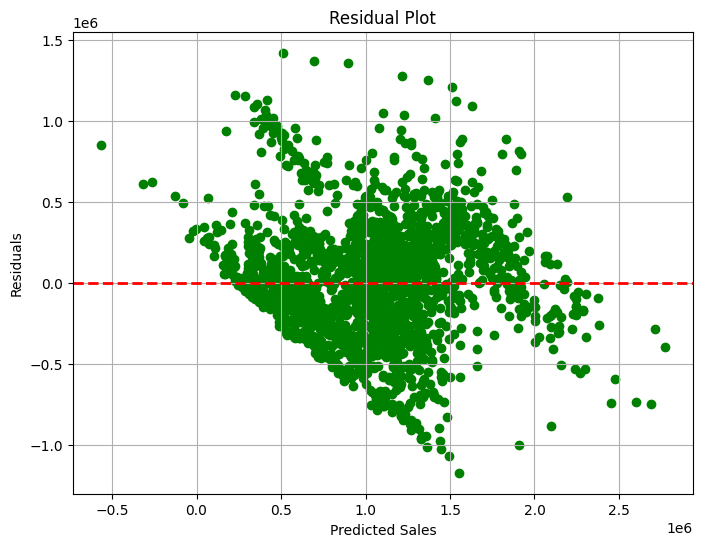

In [735]:
#residuals
residuals=y_test-y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred,residuals,color='green')
plt.axhline(0,color='red',linestyle='--',linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.grid()
plt.show()

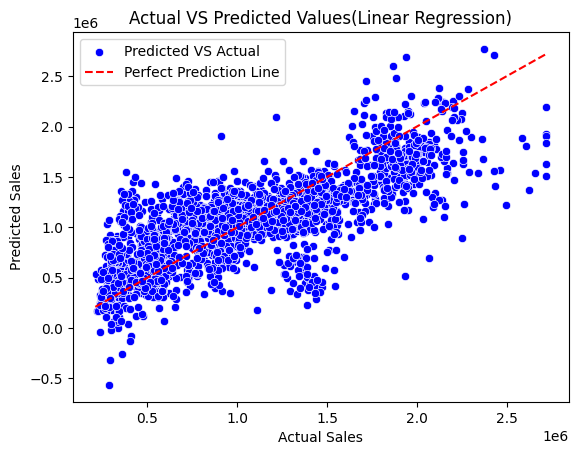

In [736]:
sns.scatterplot(x=y_test,y=y_pred,color='blue',label='Predicted VS Actual')
plt.plot([y.min(),y.max()],[y.min(),y.max()],'--',color='red',label='Perfect Prediction Line')
plt.title('Actual VS Predicted Values(Linear Regression)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend()
plt.show()

In [737]:
df_error=pd.DataFrame()
df_error['y_test']=y_test
df_error['y_predicted']=y_pred

In [738]:
df_error

,y_test,y_predicted
2436,1138800.32,1.115882e+06
3361,1304850.67,1.206357e+06
233,1769296.25,1.285039e+06
3667,1077640.13,1.279546e+06
5011,428851.99,6.289540e+05
...,...,...
1465,1293472.80,1.153230e+06
6270,323410.94,2.226560e+05
4522,1151258.74,1.169943e+06
219,1743816.41,1.506383e+06


In [739]:
y_test.shape,y_pred.shape

((1931,), (1931,))

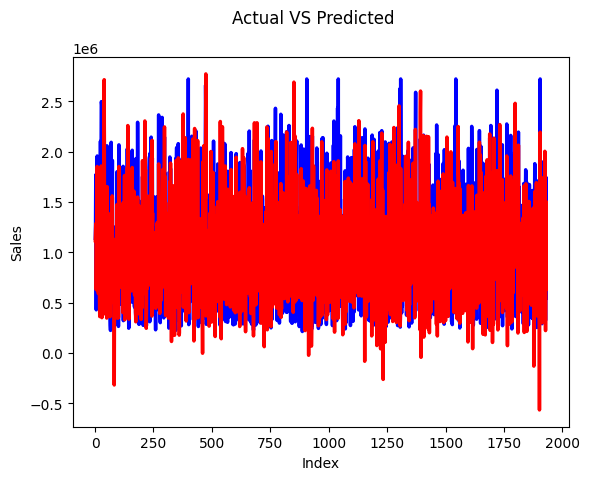

In [740]:
c=[i for i in range(1,1932)]
fig=plt.figure()
plt.plot(c,y_test,color='blue',linewidth=2.5,linestyle='-')
plt.plot(c,y_pred,color='red',linewidth=2.5,linestyle='-')
fig.suptitle('Actual VS Predicted')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.show()